In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 653.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.8 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.8 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.8 MB 3.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.8 MB 4.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.8 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.8 MB 4.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.6/9.8 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.8 MB 4.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.2/9.8 MB 4.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.5/9.8 MB 5.0 MB/s eta 0:00:02
   ---------- ----------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### Handling the missing number
Filling the missing number with mode

In [15]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:

data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])
data['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [19]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [20]:
#Filling the missing number with mode
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])
data['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

#### Handling Categorical features

In [21]:
cate_feat = [feat for feat in data.columns if data[feat].dtype == 'O' ]
cate_feat

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [25]:
data.Gender.unique()

array(['F', 'M'], dtype=object)

In [26]:
#Handling gender feature
data['Gender'] = data['Gender'].map({'F' : 0, 'M': 1})
data['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64

In [28]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
data['Age']= data['Age'].map({'0-17' : 1, 
                 '18-25': 2, 
                 '26-35': 3,
                 '36-45': 4,
                 '46-50': 5,
                 '51-55': 6,
                 '55+': 7})

In [30]:
data['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [39]:
data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

In [40]:
data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].str.replace('4+', '4').astype(int)
data['Stay_In_Current_City_Years']


AttributeError: Can only use .str accessor with string values!

In [31]:
data['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [33]:
city_cat= pd.get_dummies(data['City_Category'], drop_first=True).astype(int)
city_cat

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [41]:
df = pd.concat([data, city_cat], axis=1)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,B,4,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
 12  B                           550068 non-null  int32  
 13  C             

#### Removing Unwanted Columns

In [45]:
df.drop_duplicates()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,0,0
4,1000002,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,1,0
550064,1006035,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,0,1
550065,1006036,P00375436,0,3,15,B,4,1,20,8.0,16.0,137,1,0
550066,1006038,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,0,1


In [46]:
df.drop(columns=['User_ID','Product_ID','City_Category'], inplace=True)
df

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368,1,0
550064,0,3,1,3,0,20,8.0,16.0,371,0,1
550065,0,3,15,4,1,20,8.0,16.0,137,1,0
550066,0,7,1,2,0,20,8.0,16.0,365,0,1


In [60]:
df.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,3.496430,8.076707,1.858418,0.409653,5.404270,9.260768,14.989567,9263.968713,0.420263,0.311189
std,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,4.294093,2.739846,5023.065394,0.493601,0.462980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.000000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.000000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.000000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


In [59]:
df.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004262,0.117291,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060346,-0.006155,-0.000426
Age,-0.004262,1.000000,0.091463,-0.004712,0.311738,0.061197,0.041075,0.037073,0.015839,-0.017950,0.110616
Occupation,0.117291,0.091463,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833,-0.011673,0.034529
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422,0.011008,0.010507
Marital_Status,-0.011603,0.311738,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463,-0.001863,0.033661
Product_Category_1,-0.045594,0.061197,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703,-0.006076,-0.008554
Product_Category_2,-0.012445,0.041075,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651,-0.003020,-0.001224
Product_Category_3,-0.006003,0.037073,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945,0.004314,-0.020910
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.006155,-0.017950,-0.011673,0.011008,-0.001863,-0.006076,-0.003020,0.004314,-0.019098,1.000000,-0.572277


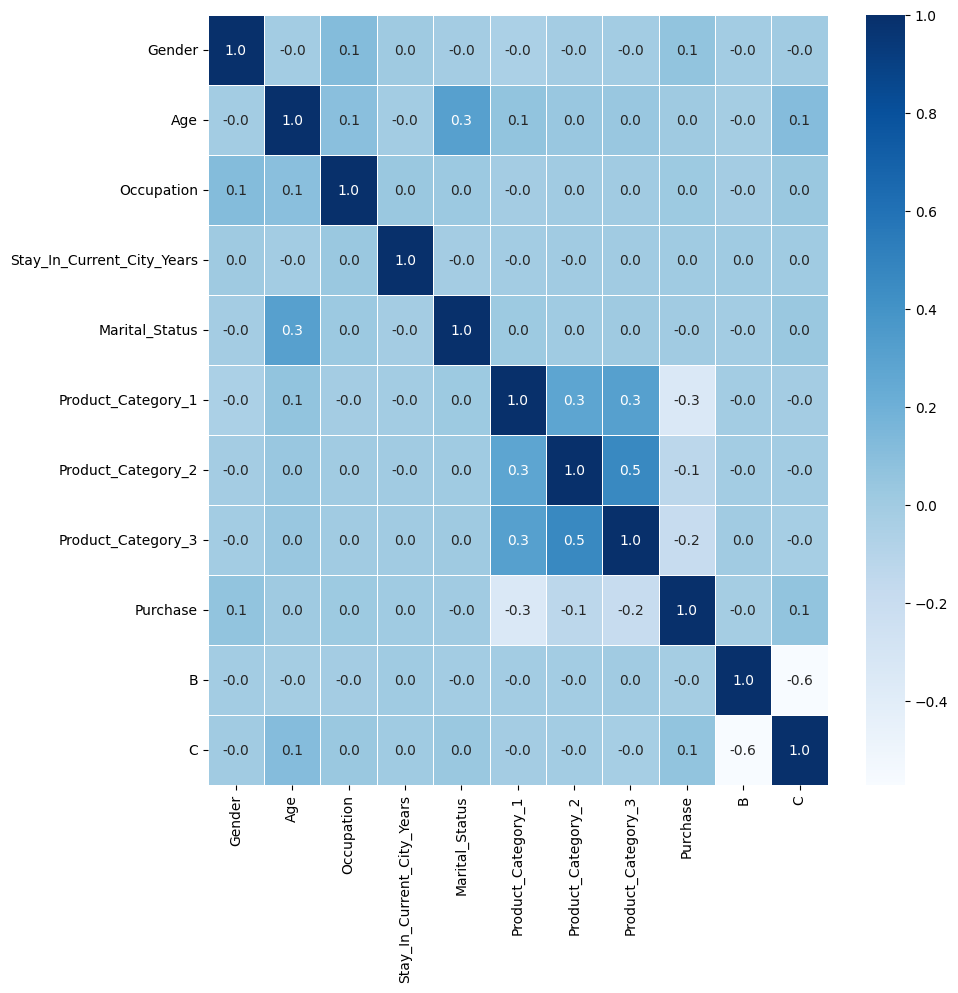

In [63]:
#correlation map
figure, ax = plt.subplots(figsize= (10, 10))
sns.heatmap(df.corr(), linewidths=0.5, cmap='Blues', annot=True, fmt='.1f', ax=ax)
plt.show()

#### Training the Model

In [52]:
#loading the independent variables
X = df.drop('Purchase', axis =1)
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,0,1


In [51]:
#Loading the dependent/target variable
y= df['Purchase']
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [ ]:
plt.scatter(X_train_scaled, y_train)
plt.show()

In [54]:
# Spliting the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(385047, 10)

In [56]:
X_test.shape

(165021, 10)

In [57]:
#feature scaling
sc=StandardScaler()
X_train_scaled =sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)
X_train_scaled

array([[ 0.57162531, -0.36693322,  1.21508142, ...,  0.36881237,
        -0.85069198, -0.67262255],
       [ 0.57162531, -0.36693322, -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [ 0.57162531, -1.1051074 , -0.1648446 , ...,  0.36881237,
        -0.85069198, -0.67262255],
       ...,
       [-1.74939769, -1.1051074 , -1.08479527, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.62481993, ...,  0.36881237,
         1.17551361, -0.67262255],
       [-1.74939769, -1.1051074 , -0.93147016, ...,  0.36881237,
        -0.85069198, -0.67262255]])

In [84]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)

In [70]:
#model A Linear Regression
lr = LinearRegression()
model_lr = lr.fit(X_train_scaled, y_train)
pred= model_lr.predict(X_test_scaled)

In [72]:
# Model B DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_dtr = dtr.fit(X_train_scaled, y_train)
pred_2 = model_dtr.predict(X_test_scaled)

In [75]:
# Model C RandomForest Regessor
import time
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
start = time.time()
model_rfr = rfr.fit(X_train_scaled, y_train)
end = time.time()
pre_3 = model_rfr.predict(X_test_scaled)

In [76]:
print('Time: ', end - start, 'seconds')

Time:  200.73532128334045 seconds


In [93]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae_A =mean_absolute_error(y_test, pred)
mse_A =mean_squared_error(y_test , pred)
rsme = np.sqrt(mse_A)
r2_A =r2_score(y_test, pred)
print(f'MSE_LinearReg = {mse_A}, MAE ={mae_A}, RSME = {rsme}, R2 ={r2_A}')


MSE_LinearReg = 21944298.789887924, MAE =3577.432786241114, RSME = 4684.474227689584, R2 =0.12927310647633372


In [96]:
mae_B =mean_absolute_error(y_test, pred_2)
mse_B =mean_squared_error(y_test , pred_2)
rsme_B = np.sqrt(mse_B)
r2_B=r2_score(y_test, pred_2)
print(f'MSE_DecisionTreeReg = {mse_B}, MAE ={mae_B}, RSME = {rsme_B}, R2 ={r2_B}')

MSE_DecisionTreeReg = 11104524.702093326, MAE =2359.144765187446, RSME = 3332.34522552711, R2 =0.5593840390850822


In [98]:
mae_C =mean_absolute_error(y_test, pre_3)
mse_C =mean_squared_error(y_test , pre_3)
rsme_C = np.sqrt(mse_C)
r2_C= r2_score(y_test, pre_3)
print(f'MSE_RandomForestReg = {mse_C}, MAE ={mae_C}, RSME = {rsme_C}, R2 ={r2_C}')

MSE_RandomForestReg = 9330482.399556672, MAE =2224.0096960047426, RSME = 3054.583834101901, R2 =0.6297761877637688


In [105]:
print(f'test = {y_test.iloc[0]}, linreg = {pred.iloc[0]}, dtr = {pred_2.iloc[0]}, rfr = {pre_3.iloc[0]}')


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [106]:
print('Linear = ', pred)
print('Decision = ', pred_2)
print('Random = ', pre_3)


Linear =  [11817.60519671 10475.00229254  7366.15201815 ... 11292.3914949
 10465.94638941  9092.37459695]
Decision =  [15623.         19245.          5670.         ... 13750.5
 14421.8         6213.22641509]
Random =  [13658.83544444 14666.93519892  6809.43858153 ... 13841.9295
 14441.17780556  6199.24676746]
